## Importando Bibliotecas

In [1]:
#Importando as bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report,confusion_matrix,f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
import missingno as missing
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot #grafico

## Criando Driver no Colab


In [2]:
#Criando drive no colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lendo arquivos

In [3]:
# importanto os conjuntos de dados disponíveis nesta mesma pasta Data
treino = pd.read_csv('/content/drive/My Drive/Competição FLAI/treino.csv')
sub = pd.read_csv('/content/drive/My Drive/Competição FLAI/teste.csv')

## Criando Coluna nova para analises.
Transformando os dados Normais e Premiuns em variaveis numericas 

In [5]:
encoder=LabelEncoder()

transform = treino.dtypes[treino.dtypes == 'object'].keys()
for col in transform:
    if col !="Cliente":
      treino[col] = encoder.fit_transform(list(treino[col].values.astype('str')))
    


dic_cliente = {'Normal':0,'Premium':1}
treino['Cliente1']=treino['Cliente'].map(dic_cliente)

treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,Cliente1
0,0,0,0,0,20,1,0,2,1,1,1,1,1,1,2,0,3,Normal,0
1,0,0,1,1,59,1,2,0,2,2,0,2,0,0,1,0,3,Premium,1
2,0,0,1,1,68,0,1,0,0,2,2,2,2,2,2,0,1,Premium,1
3,0,0,0,1,35,1,2,0,0,0,0,0,0,0,0,0,3,Premium,1
4,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,Normal,0


## Separando o modelo de treino e teste

In [6]:
dados_ml = treino.iloc[:1999]
dados_validacao=treino.iloc[2000:]

In [8]:
X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=42)

In [9]:
#Benchmark
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 53.50%


## Testando Modelos

In [ ]:
#Testando outros modelos
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  cv=KFold(n_splits=10, random_state=0, shuffle=True)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=cv)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('F1 Score')

  y_pred_treino = clf.predict(X_treino)
  f1_treino = f1_score(Y_treino, y_pred_treino)
  print('Treino', f1_treino)

  y_pred_teste = clf.predict(X_teste)
  f1_teste = f1_score(Y_teste,y_pred_teste)
  print('Test', f1_teste)
  print('='*80)

##XGBClassifier

In [12]:
#Ajustando o XGBClassifier
kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']



# f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = xgb.XGBClassifier(seed=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    # f1_score = f1_score(yval,y_pred)
    # f1_lista.append(f1_score)
    #print('Fold: {}'.format(i))
    #print('-'*60)
    #print(classification_report(yval, y_pred))
    #print('='*60)

In [13]:
# calculate AUC
auc = roc_auc_score(yval, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.992


A acurácia do XGBCLassifier foi 98.99%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

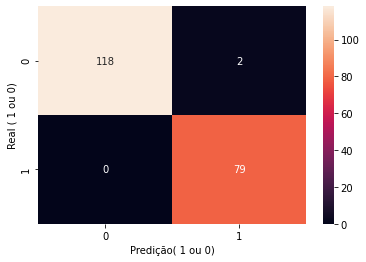

In [14]:
#Matrix de Confusão XGBCLassifier
cm=confusion_matrix(yval, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
y_pred = clf.predict(Xval)
acuracia = clf.score(Xval, yval) * 100

print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

##Fazendo as previsões



In [ ]:
dados_validacao.head()

In [15]:
X_val=dados_validacao.drop(columns=['Cliente','Cliente1'],axis=1)
y_val=dados_validacao['Cliente1']

In [16]:
kf = KFold(n_splits=10,random_state=0,shuffle=True)

X=dados_ml.drop(columns=['Cliente','Cliente1'],axis=1)
y=dados_ml['Cliente1']

clf.fit(X,y)
    
y_pred_validacao=clf.predict(X_val)
print(classification_report(y_val, y_pred_validacao))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       228
           1       0.99      0.96      0.98       272

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



##Gerando os valores do Submission

In [ ]:
transform_2 = sub.dtypes[sub.dtypes == 'object'].keys()
for col in transform_2:
  sub[col] = encoder.fit_transform(list(sub[col].values.astype('str')))
    
sub.head()

In [23]:
previsao

array([0, 0, 0, ..., 0, 0, 1])

In [25]:
treino['Cliente'] 

0        Normal
1       Premium
2       Premium
3       Premium
4        Normal
         ...   
2495     Normal
2496    Premium
2497    Premium
2498     Normal
2499    Premium
Name: Cliente, Length: 2500, dtype: object

In [18]:
#submission1
previsao=clf.predict(sub)

subm = pd.DataFrame()
subm['Cliente'] = previsao
subm.to_csv('/content/drive/My Drive/Competição FLAI/sub_Emmanuel4.csv', index = False)

In [19]:
subm

,Cliente
0,0
1,0
2,0
3,1
4,1
...,...
2495,1
2496,0
2497,0
2498,0
